# The numbers behind Formula One champions

On this notebook, I will analise several statistics of Formula One's most succesfull drivers. The covered topics will be:
* The top 10 drivers with the most wins, and the highest win %
* How the definition of a successfull driver changed over the years
* The influence the team has over a driver's success
* Longest streaks

For this analysis, I will be using ergast's database. More info about it can be found at http://ergast.com/mrd/

In [1]:
# Standart imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import requests


Bad key "text.kerning_factor" on line 4 in
C:\Users\Leonardo\Documents\Python\Research-Projects\research-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Top 10 "best" drivers

In this section, we analyze the 10 drivers who won the most.

First, let's use the api to see which seasons it has data of.

In [2]:
response = requests.get(url="http://ergast.com/api/f1/seasons.json?limit=73&offset=0")
data = response.json()
list_of_seasons = []
for season in data["MRData"]["SeasonTable"]["Seasons"]:
    list_of_seasons.append(season["season"])
print(len(list_of_seasons))

73


F1's first season was back in 1950. So the database used has all seasons logged.

Now, let's see an example of how to make a graph with the winners of a season.

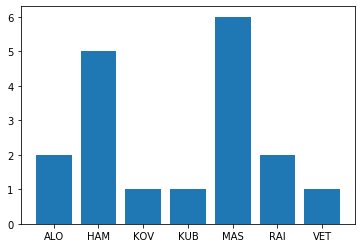

In [50]:
response = requests.get(url="http://ergast.com/api/f1/2008/results/1.json")
data = response.json()
winners_2008 = []
for race in data["MRData"]["RaceTable"]["Races"]:
    winners_2008.append(race["Results"][0]["Driver"]["code"])

drivers, nmbr_wins = np.unique(winners_2008, return_counts=True)
plt.bar(x=drivers, height=nmbr_wins, align="center");

So we see that Felipe Massa won one more race than Lewis Hamilton, but still lost the 2008 championship.

Now, let's try to do the same, but for every season in Formula 1.

In [42]:
# First, let's create a dictionary with the drivers' names and their number of wins
year = 1950
winners_list = []
winners_dict = {}
for i in range(73):
    # Sorting through all seasons
    response = requests.get(url=f"http://ergast.com/api/f1/{year+i}/results/1.json")
    data = response.json()
    for race in data["MRData"]["RaceTable"]["Races"]:
        # Every time a driver wins, let's append his/her name to winners_list
        winners_list.append(race["Results"][0]["Driver"]["givenName"]+race["Results"][0]["Driver"]["familyName"])
for driver in winners_list:
    winners_dict[driver] = winners_list.count(driver)
winners_dict

{'NinoFarina': 5,
 'JuanFangio': 23,
 'JohnnieParsons': 1,
 'LeeWallard': 1,
 'José FroilánGonzález': 2,
 'AlbertoAscari': 13,
 'PieroTaruffi': 1,
 'TroyRuttman': 1,
 'BillVukovich': 2,
 'MikeHawthorn': 3,
 'MauriceTrintignant': 2,
 'BobSweikert': 1,
 'StirlingMoss': 15,
 'LuigiMusso': 1,
 'PatFlaherty': 1,
 'PeterCollins': 3,
 'SamHanks': 1,
 'TonyBrooks': 6,
 'JimmyBryan': 1,
 'JackBrabham': 14,
 'RodgerWard': 1,
 'JoBonnier': 1,
 'BruceMcLaren': 4,
 'JimRathmann': 1,
 'PhilHill': 3,
 'Wolfgangvon Trips': 2,
 'GiancarloBaghetti': 1,
 'InnesIreland': 1,
 'GrahamHill': 14,
 'JimClark': 25,
 'DanGurney': 4,
 'JohnSurtees': 6,
 'LorenzoBandini': 1,
 'JackieStewart': 27,
 'RichieGinther': 1,
 'LudovicoScarfiotti': 1,
 'PedroRodríguez': 2,
 'DennyHulme': 8,
 'JackyIckx': 8,
 'JoSiffert': 2,
 'JochenRindt': 6,
 'ClayRegazzoni': 5,
 'EmersonFittipaldi': 14,
 'MarioAndretti': 12,
 'PeterGethin': 1,
 'FrançoisCevert': 1,
 'Jean-PierreBeltoise': 1,
 'RonniePeterson': 10,
 'PeterRevson': 2,
 'Ca

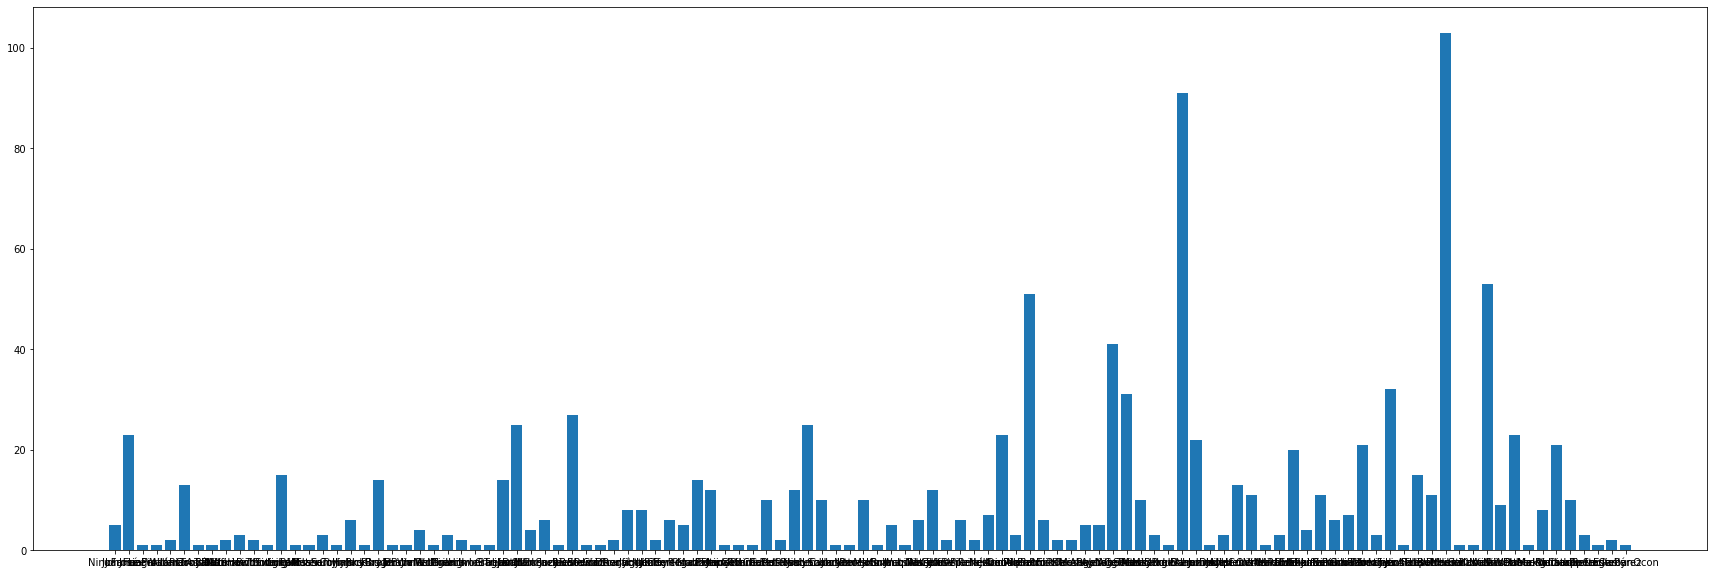

In [43]:
plt.subplots(figsize=(30,10))
plt.bar(x=winners_dict.keys(), height=winners_dict.values(), align="center");

In [99]:
# Making a DataFrame to make things clearer
driver_series = pd.Series(winners_dict.keys())
wins_series = pd.Series(winners_dict.values())
wincount_df = pd.DataFrame(winners_dict.values(), index=list(winners_dict.keys()), columns=["Number of wins"])
wincount_df

,Drivers,Number of wins
5,NaN,NaN
23,NaN,NaN
1,NaN,NaN
1,NaN,NaN
2,NaN,NaN
...,...,...
10,NaN,NaN
3,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [85]:
# Now let's see the top 10 winners.
top_10 = wincount_df.sort_values("Number of wins", ascending=False)[:10]
top_10

,Number of wins
LewisHamilton,103
MichaelSchumacher,91
SebastianVettel,53
AlainProst,51
AyrtonSenna,41
FernandoAlonso,32
NigelMansell,31
JackieStewart,27
NikiLauda,25
JimClark,25


<BarContainer object of 10 artists>

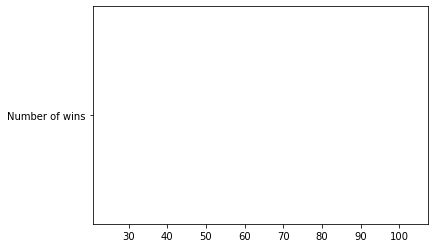

In [96]:
# Making a graph of these guys
plt.bar(height=top_10.keys(), x=top_10["Number of wins"])